In [916]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [825]:
df_train = pd.read_csv('train.csv')
df_test1 = pd.read_csv('test.csv')
df_test2 = pd.read_csv('gender_submission.csv')

df_test = df_test1.merge(df_test2)
df_train = df_train.drop(columns=['Name','Ticket','Name','Cabin'])
df_test = df_test.drop(columns=['Name','Ticket','Name','Cabin'])
# df_train.dropna(axis=0, how='any', inplace=True)
df_train['Age'] = df_train['Age'].replace(np.nan, np.mean(df_train['Age']))
df_test['Age'] = df_test['Age'].replace(np.nan, np.mean(df_test['Age']))  
df_test['Fare'] = df_test['Fare'].replace(np.nan, np.mean(df_test['Fare'])) 
# df_test.dropna(axis=0,how='all')

In [826]:
df_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked        True
dtype: bool

In [827]:
df_train.dropna(axis=0, how='any', inplace=True)

In [828]:
df_test.isna().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Survived       False
dtype: bool

In [829]:
# df_train.dropna(axis=0, how='any', inplace=True)

In [830]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.50000,0,0,7.8292,Q,0
1,893,3,female,47.00000,1,0,7.0000,S,1
2,894,2,male,62.00000,0,0,9.6875,Q,0
3,895,3,male,27.00000,0,0,8.6625,S,0
4,896,3,female,22.00000,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,8.0500,S,0
414,1306,1,female,39.00000,0,0,108.9000,C,1
415,1307,3,male,38.50000,0,0,7.2500,S,0
416,1308,3,male,30.27259,0,0,8.0500,S,0


In [831]:
df_train.set_index(df_train['PassengerId'], drop=True, inplace=True, verify_integrity=False)
df_test.set_index(df_test['PassengerId'], drop=True, inplace=True, verify_integrity=False)

In [832]:
df_train.replace(to_replace='male', value=1, inplace=True, method='pad')
df_train.replace(to_replace='female', value=0, inplace=True, method='pad')

df_test.replace(to_replace='male', value=1, inplace=True, method='pad')
df_test.replace(to_replace='female', value=0, inplace=True, method='pad')

In [833]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,1,0,3,1,22.000000,1,0,7.2500,S
2,2,1,1,0,38.000000,1,0,71.2833,C
3,3,1,3,0,26.000000,0,0,7.9250,S
4,4,1,1,0,35.000000,1,0,53.1000,S
5,5,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,887,0,2,1,27.000000,0,0,13.0000,S
888,888,1,1,0,19.000000,0,0,30.0000,S
889,889,0,3,0,29.699118,1,2,23.4500,S


In [835]:
df_train.loc[df_train['Age'] <= 11, 'Age'] = 0
df_train.loc[(df_train['Age'] > 11) & (df_train['Age'] <= 18), 'Age'] = 1
df_train.loc[(df_train['Age'] > 18) & (df_train['Age'] <= 22), 'Age'] = 2
df_train.loc[(df_train['Age'] > 22) & (df_train['Age'] <= 27), 'Age'] = 3
df_train.loc[(df_train['Age'] > 27) & (df_train['Age'] <= 33), 'Age'] = 4
df_train.loc[(df_train['Age'] > 33) & (df_train['Age'] <= 46), 'Age'] = 5
df_train.loc[(df_train['Age'] > 46) & (df_train['Age'] <= 66), 'Age'] = 6
df_train.loc[df_train['Age'] >= 66, 'Age'] = 7
#distribution
df_train['Age'].value_counts()      

4.0    303
5.0    152
3.0    106
2.0     92
6.0     90
1.0     71
0.0     68
7.0      7
Name: Age, dtype: int64

In [836]:
df_test.loc[df_test['Age'] <= 11, 'Age'] = 0
df_test.loc[(df_test['Age'] > 11) & (df_test['Age'] <= 18), 'Age'] = 1
df_test.loc[(df_test['Age'] > 18) & (df_test['Age'] <= 22), 'Age'] = 2
df_test.loc[(df_test['Age'] > 22) & (df_test['Age'] <= 27), 'Age'] = 3
df_test.loc[(df_test['Age'] > 27) & (df_test['Age'] <= 33), 'Age'] = 4
df_test.loc[(df_test['Age'] > 33) & (df_test['Age'] <= 46), 'Age'] = 5
df_test.loc[(df_test['Age'] > 46) & (df_test['Age'] <= 66), 'Age'] = 6
df_test.loc[df_test['Age'] >= 66, 'Age'] = 7
#distribution
df_test['Age'].value_counts()  

4.0    139
3.0     65
5.0     63
2.0     48
6.0     47
1.0     32
0.0     22
7.0      2
Name: Age, dtype: int64

In [837]:
df_train.loc[df_train['Fare'] <= 100, 'Fare'] = 0
df_train.loc[(df_train['Fare'] > 100) & (df_train['Fare'] <= 200), 'Fare'] = 1
df_train.loc[(df_train['Fare'] > 200) & (df_train['Fare'] <= 300), 'Fare'] = 2
df_train.loc[(df_train['Fare'] > 300) & (df_train['Fare'] <= 400), 'Fare'] = 3
df_train.loc[(df_train['Fare'] > 400) & (df_train['Fare'] <= 500), 'Fare'] = 4
df_train.loc[(df_train['Fare'] > 500) & (df_train['Fare'] <= 600), 'Fare'] = 5
df_train.loc[(df_train['Fare'] > 600), 'Fare'] = 6
#distribution
df_train['Fare'].value_counts()   

0.0    836
1.0     33
2.0     17
5.0      3
Name: Fare, dtype: int64

In [838]:
df_test.loc[df_test['Fare'] <= 100, 'Fare'] = 0
df_test.loc[(df_test['Fare'] > 100) & (df_test['Fare'] <= 200), 'Fare'] = 1
df_test.loc[(df_test['Fare'] > 200) & (df_test['Fare'] <= 300), 'Fare'] = 2
df_test.loc[(df_test['Fare'] > 300) & (df_test['Fare'] <= 400), 'Fare'] = 3
df_test.loc[(df_test['Fare'] > 400) & (df_test['Fare'] <= 500), 'Fare'] = 4
df_test.loc[(df_test['Fare'] > 500) & (df_test['Fare'] <= 600), 'Fare'] = 5
df_test.loc[(df_test['Fare'] > 600), 'Fare'] = 6
#distribution
df_test['Fare'].value_counts()

0.0    387
2.0     17
1.0     13
5.0      1
Name: Fare, dtype: int64

In [842]:
df_train['Embarked'] = df_train['Embarked'].replace(['S','C','Q'],[1,2,3])
df_test['Embarked'] = df_test['Embarked'].replace(['S','C','Q'],[1,2,3])


In [843]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch']
df_test['Family'] = df_test['SibSp'] + df_test['Parch']
# df_train = df_train.drop(columns=['PassengerId'], axis=1)
# df_test = df_test.drop(columns=['PassengerId'], axis=1)

In [844]:
df_train['Family'].value_counts()

0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [845]:
df_train.isna().any()


PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Family         False
dtype: bool

In [846]:
df_test.isna().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Fare           False
Embarked       False
Survived       False
Family         False
dtype: bool

In [856]:
X_train = df_train[['Fare','Pclass','Sex','Age', 'Embarked', 'Family','SibSp','Parch']]
y_train = df_train[['Survived']]

X_test = df_test[['Fare','Pclass','Sex','Age', 'Embarked', 'Family','SibSp','Parch']]
y_test = df_test[['Survived']]

In [857]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
PassengerId,1.000000,-0.005028,-0.035330,0.043136,0.030831,-0.057686,-0.001657,0.022507,-0.030555,-0.040258
Survived,-0.005028,1.000000,-0.335549,-0.541585,-0.068814,-0.034040,0.083151,0.162922,0.108669,0.018277
Pclass,-0.035330,-0.335549,1.000000,0.127741,-0.293507,0.081656,0.016824,-0.333162,0.043835,0.064221
Sex,0.043136,-0.541585,0.127741,1.000000,0.095397,-0.116348,-0.247508,-0.109492,-0.118593,-0.203191
Age,0.030831,-0.068814,-0.293507,0.095397,1.000000,-0.241311,-0.212773,0.039359,0.036224,-0.271253
SibSp,-0.057686,-0.034040,0.081656,-0.116348,-0.241311,1.000000,0.414542,0.016439,-0.060606,0.890654
Parch,-0.001657,0.083151,0.016824,-0.247508,-0.212773,0.414542,1.000000,0.127044,-0.079320,0.782988
Fare,0.022507,0.162922,-0.333162,-0.109492,0.039359,0.016439,0.127044,1.000000,0.082507,0.074712
Embarked,-0.030555,0.108669,0.043835,-0.118593,0.036224,-0.060606,-0.079320,0.082507,1.000000,-0.081057
Family,-0.040258,0.018277,0.064221,-0.203191,-0.271253,0.890654,0.782988,0.074712,-0.081057,1.000000


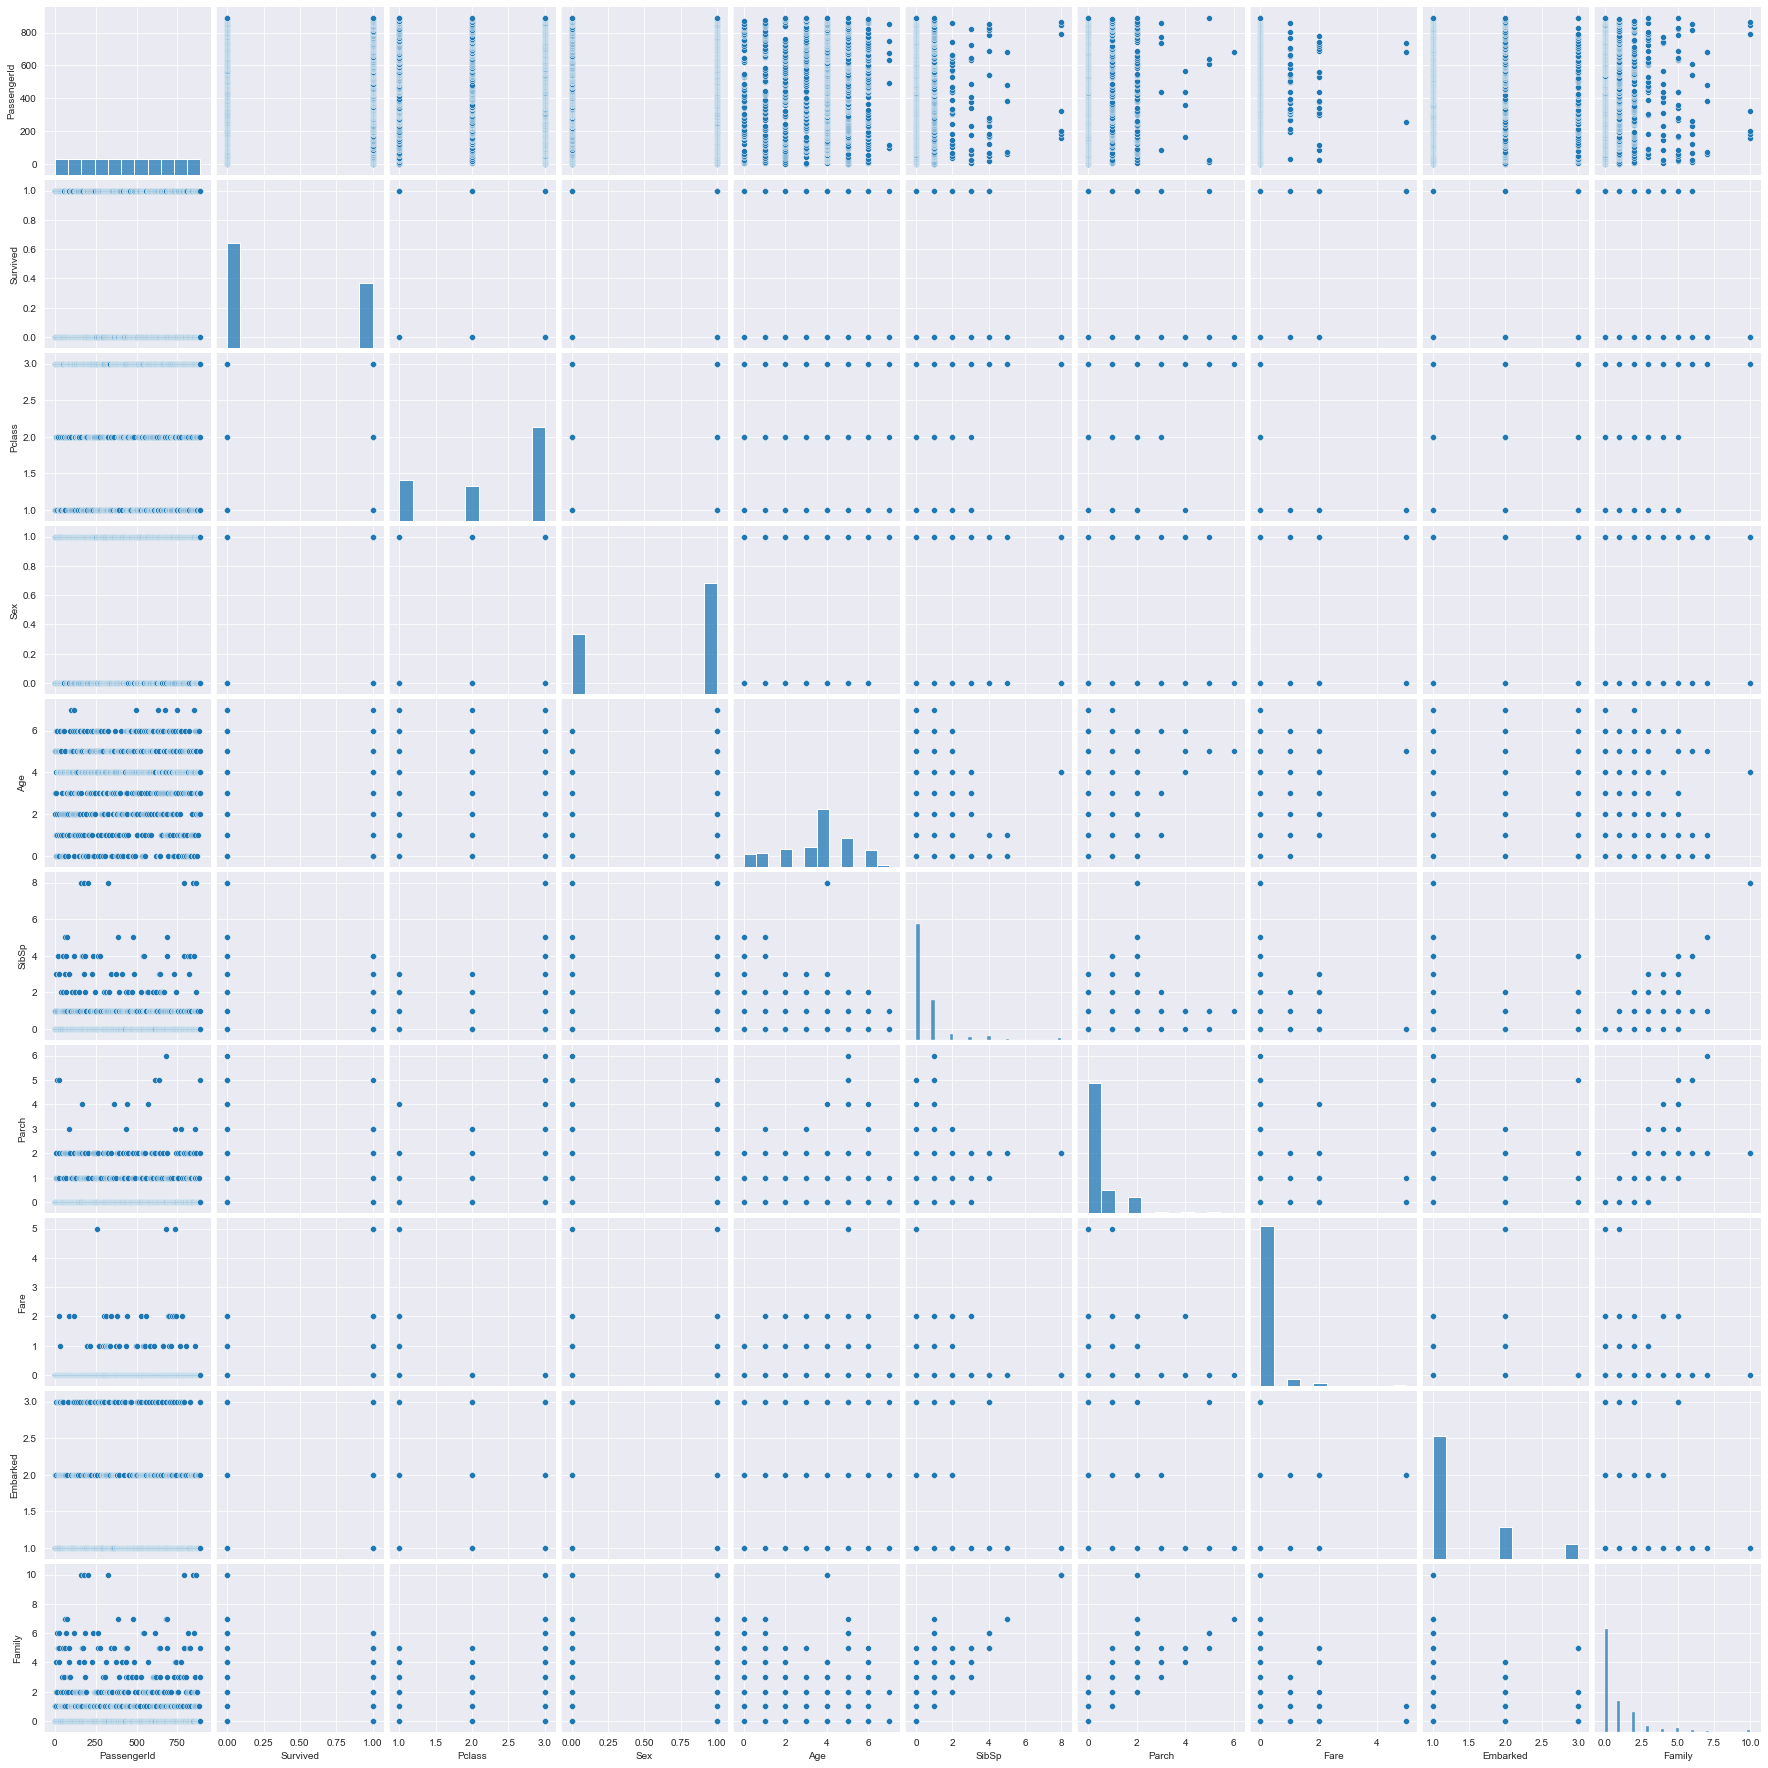

In [858]:
sns.pairplot(df_train)

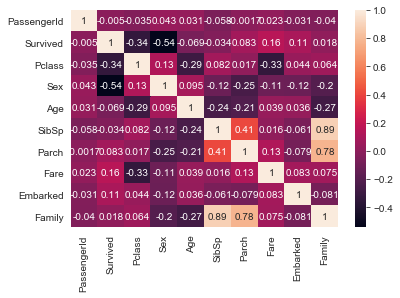

In [859]:
sns.heatmap(df_train.corr(),annot=True)

In [ ]:
# Logstic Regression Model

In [883]:
log_regression_model = LogisticRegression()

In [884]:
log_regression_model_fit = log_regression_model.fit(X_train,y_train.values.ravel())

In [885]:
y_pred_log_re = log_regression_model_fit.predict(X_test)

In [902]:
print(('Recall Score:'),recall_score(y_test, y_pred_log_re),
     ('Precision Score:'),precision_score(y_test,y_pred_log_re),
     ('F1 Score:'),f1_score(y_test,y_pred_log_re))

Recall Score: 0.9210526315789473 Precision Score: 0.9271523178807947 F1 Score: 0.9240924092409241


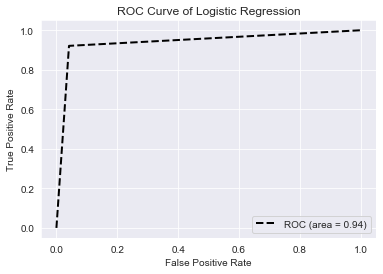

In [923]:
fpr_log, tpr_log, thersholds = roc_curve(y_test, y_pred_log_re)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc_log), lw=2)
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve of Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# RandomForest Model

In [929]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train.values.ravel())

y_pred_random_forest = random_forest.predict(X_test)

random_forest_accuracy = round(random_forest.score(X_train, y_train.values.ravel())*100, 2)

In [903]:
print(('Recall Score:'),recall_score(y_test, y_pred_random_forest),
     ('Precision Score:'),precision_score(y_test,y_pred_random_forest),
     ('F1 Score:'),f1_score(y_test,y_pred_random_forest))

Recall Score: 0.8026315789473685 Precision Score: 0.8472222222222222 F1 Score: 0.8243243243243243


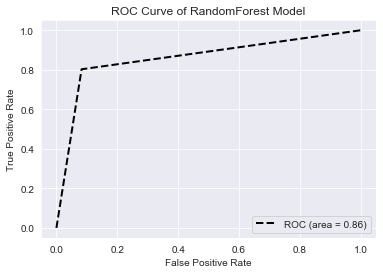

In [924]:
fpr_random_forest, tpr_random_forest, thersholds = roc_curve(y_test, y_pred_random_forest)
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)
plt.plot(fpr_random_forest, tpr_random_forest, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc_random_forest), lw=2)
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve of RandomForest Model')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# K-nearest Neighbors

In [909]:
for i in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    y_pred_knn = knn.predict(X_test)
    print(('n = '), i,
        ('Recall Score:'),recall_score(y_test, y_pred_knn),
     ('Precision Score:'),precision_score(y_test,y_pred_knn),
     ('F1 Score:'),f1_score(y_test,y_pred_knn))

n =  1 Recall Score: 0.7368421052631579 Precision Score: 0.6829268292682927 F1 Score: 0.7088607594936709
n =  2 Recall Score: 0.5855263157894737 Precision Score: 0.7876106194690266 F1 Score: 0.6716981132075472
n =  3 Recall Score: 0.7697368421052632 Precision Score: 0.7597402597402597 F1 Score: 0.7647058823529412
n =  4 Recall Score: 0.6644736842105263 Precision Score: 0.808 F1 Score: 0.7292418772563177
n =  5 Recall Score: 0.7697368421052632 Precision Score: 0.7548387096774194 F1 Score: 0.7622149837133549
n =  6 Recall Score: 0.6842105263157895 Precision Score: 0.8 F1 Score: 0.7375886524822695
n =  7 Recall Score: 0.7828947368421053 Precision Score: 0.725609756097561 F1 Score: 0.7531645569620253
n =  8 Recall Score: 0.6973684210526315 Precision Score: 0.7794117647058824 F1 Score: 0.7361111111111112
n =  9 Recall Score: 0.7302631578947368 Precision Score: 0.7551020408163265 F1 Score: 0.7424749163879598
n =  10 Recall Score: 0.6973684210526315 Precision Score: 0.7737226277372263 F1 Scor

In [910]:
# Support Vector Machine Model

In [913]:
svc = LinearSVC()
svc.fit(X_train,y_train.values.ravel())
y_pred_svc = svc.predict(X_test)
print(('Recall Score:'),recall_score(y_test, y_pred_svc),
     ('Precision Score:'),precision_score(y_test,y_pred_svc),
     ('F1 Score:'),f1_score(y_test,y_pred_svc))

Recall Score: 0.9605263157894737 Precision Score: 0.9605263157894737 F1 Score: 0.9605263157894737


/opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


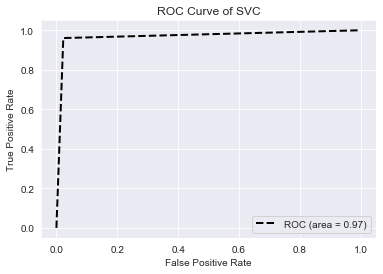

In [927]:
fpr_svc, tpr_svc, thersholds = roc_curve(y_test, y_pred_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)
plt.plot(fpr_svc, tpr_svc, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc_svc), lw=2)
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve of SVC')
plt.legend(loc="lower right")
plt.show()

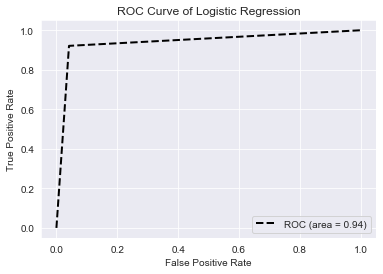